In [5]:
%pip install redis pandas matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 10.1 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import redis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [8]:
# Charger les données depuis le fichier CSV
file_path = "Transactions_Data.csv"
df = pd.read_csv(file_path)

# Convertir les colonnes en formats appropriés
df['amount'] = df['amount'].astype(float)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("Aperçu des données chargées :")
print(df.head())


Aperçu des données chargées :
                         transaction_id  user_id   amount           timestamp  \
0  b375d6c3-bcc3-4d39-8a6e-81287f325952   user_9   157.25 2025-01-16 04:01:00   
1  b3846e99-7e82-4751-8684-c157010d616f   user_3  2932.80 2025-01-28 05:02:00   
2  cd9c5c2f-84a4-4e7e-a8d8-cd9cc8516b9e   user_8  9110.46 2025-01-31 01:05:00   
3  f4d10f55-cb5a-491c-928c-ab0ba73a34f4  user_17  8162.82 2025-01-20 15:26:00   
4  e9fce3b0-2f51-46ed-9362-dd55f0b47429  user_16  8640.02 2025-01-16 21:55:00   

         type location  
0  withdrawal   London  
1  withdrawal   Sydney  
2  withdrawal   Berlin  
3    transfer   Berlin  
4  withdrawal   Berlin  


**Analyse exploratoire des données (EDA)**

In [9]:
print("\nAperçu des données :")
print(df.head())



Aperçu des données :
                         transaction_id  user_id   amount           timestamp  \
0  b375d6c3-bcc3-4d39-8a6e-81287f325952   user_9   157.25 2025-01-16 04:01:00   
1  b3846e99-7e82-4751-8684-c157010d616f   user_3  2932.80 2025-01-28 05:02:00   
2  cd9c5c2f-84a4-4e7e-a8d8-cd9cc8516b9e   user_8  9110.46 2025-01-31 01:05:00   
3  f4d10f55-cb5a-491c-928c-ab0ba73a34f4  user_17  8162.82 2025-01-20 15:26:00   
4  e9fce3b0-2f51-46ed-9362-dd55f0b47429  user_16  8640.02 2025-01-16 21:55:00   

         type location  
0  withdrawal   London  
1  withdrawal   Sydney  
2  withdrawal   Berlin  
3    transfer   Berlin  
4  withdrawal   Berlin  


In [10]:
print("\nStatistiques descriptives :")
print(df.describe())



Statistiques descriptives :
            amount                   timestamp
count   500.000000                         500
mean   4914.533700  2025-01-19 02:30:14.160000
min      52.150000         2025-01-01 09:03:00
25%    2497.735000         2025-01-10 20:00:45
50%    4686.205000         2025-01-19 05:51:30
75%    7461.642500         2025-01-27 16:14:30
max    9993.370000         2025-02-04 22:35:00
std    2918.528952                         NaN


In [11]:
print("\nNombre total de transactions :", len(df))



Nombre total de transactions : 500


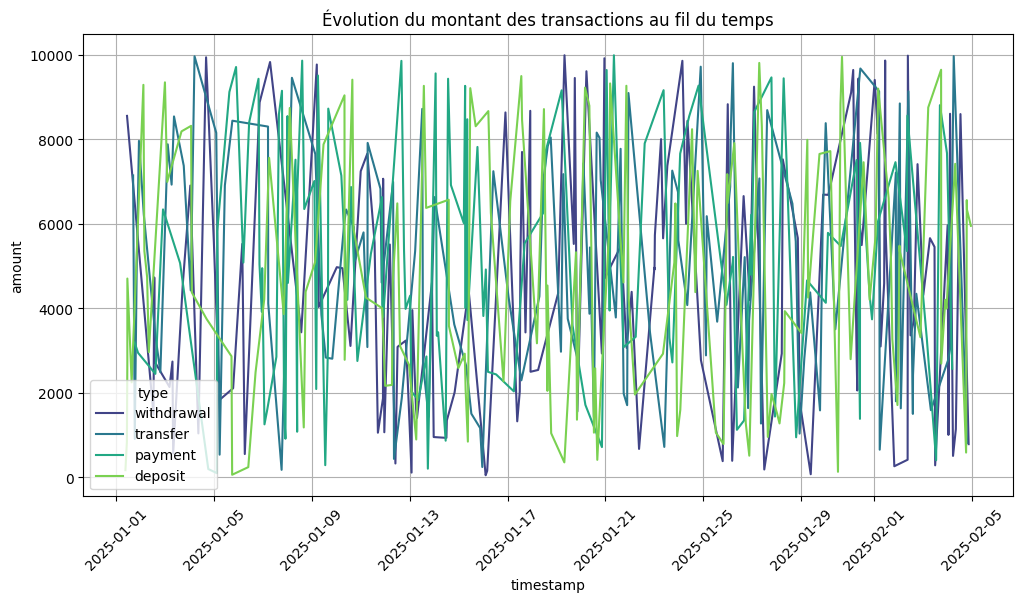

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='amount', hue='type', palette="viridis")
plt.title("Évolution du montant des transactions au fil du temps")
plt.xticks(rotation=45)
plt.grid()
plt.show()


/var/folders/1c/1r7kg_dd3s71f0qf07_y1x_h0000gn/T/ipykernel_89815/585291135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='amount', palette="Set2")


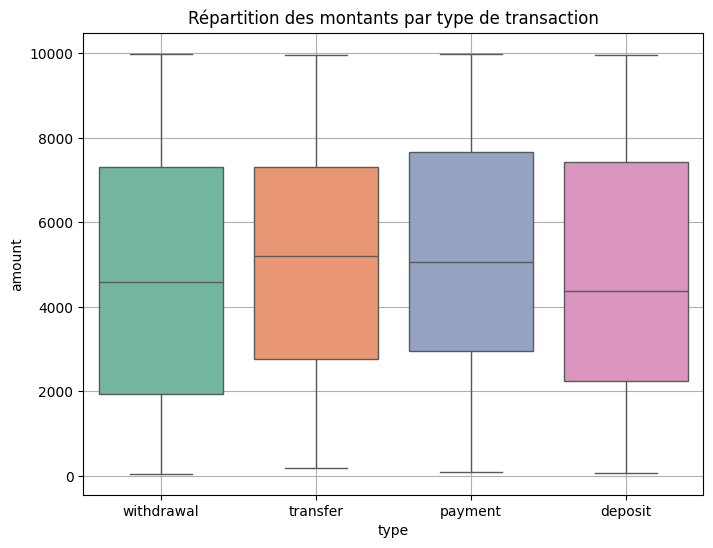

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='amount', palette="Set2")
plt.title("Répartition des montants par type de transaction")
plt.grid()
plt.show()


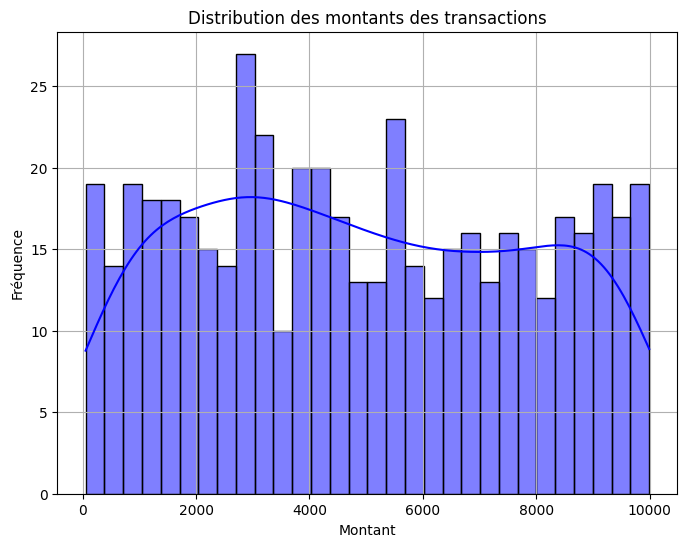

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['amount'], bins=30, kde=True, color="blue")
plt.title("Distribution des montants des transactions")
plt.xlabel("Montant")
plt.ylabel("Fréquence")
plt.grid()
plt.show()


/var/folders/1c/1r7kg_dd3s71f0qf07_y1x_h0000gn/T/ipykernel_89815/2302026987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='location', palette="pastel")


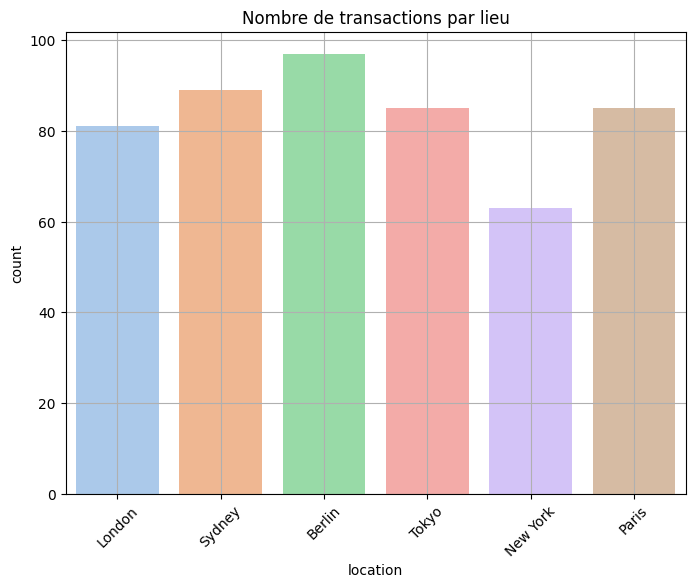

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='location', palette="pastel")
plt.title("Nombre de transactions par lieu")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [16]:
print("\nDétection des anomalies...")
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = model.fit_predict(df[['amount']])



Détection des anomalies...


In [17]:
anomalies = df[df['anomaly_score'] == -1]
print(f"\nNombre d'anomalies détectées : {len(anomalies)}")



Nombre d'anomalies détectées : 25


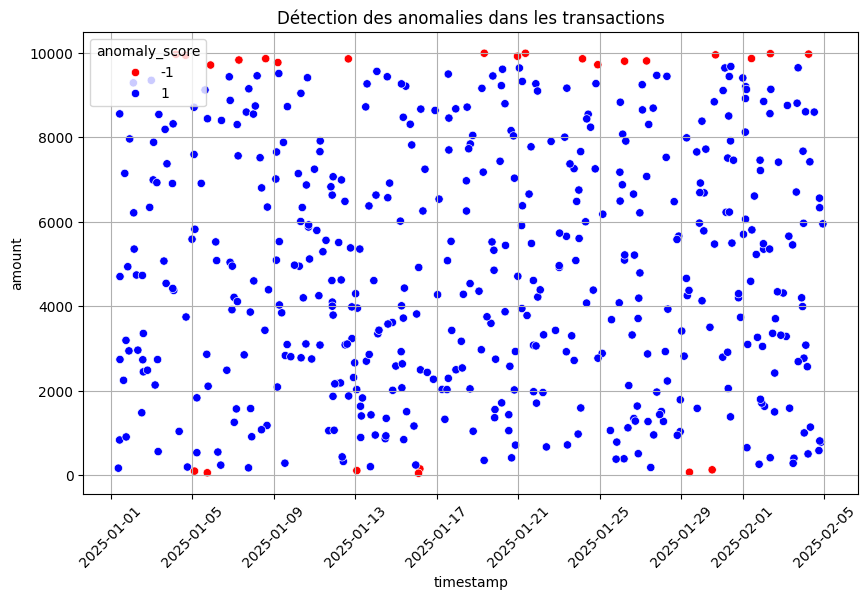

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='timestamp', y='amount', hue='anomaly_score', palette={1: 'blue', -1: 'red'})
plt.title("Détection des anomalies dans les transactions")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [19]:
print("\nTransactions considérées comme anomalies :")
print(anomalies[['transaction_id', 'amount', 'timestamp', 'location']])



Transactions considérées comme anomalies :
                           transaction_id   amount           timestamp  \
0    b375d6c3-bcc3-4d39-8a6e-81287f325952   157.25 2025-01-16 04:01:00   
28   4b79653f-57d2-4ee6-a62f-8dc39182daa2  9993.37 2025-01-19 07:51:00   
35   b08b0e8f-abbe-442a-99f4-cdce3ef0b196  9722.41 2025-01-24 21:31:00   
73   ce818cb9-84fe-40fb-a981-3a5dc69e965b  9922.06 2025-01-20 23:01:00   
104  2df130a3-794c-4083-ac8e-2a49ab6c2666    52.15 2025-01-16 02:29:00   
125  b73f589e-fb1f-4b11-a48f-73025e6140bd    76.23 2025-01-29 09:27:00   
127  1443b4c4-e4eb-4f40-8d43-abca4ecb4169  9968.78 2025-01-04 04:52:00   
131  1b12d490-9de7-41aa-80be-e2cefaa07d4d  9983.88 2025-02-02 08:45:00   
154  deae5764-f567-4a67-b236-d85f5c24d321   102.95 2025-01-05 02:42:00   
159  8f4ea0dd-466d-4fce-8802-8f39189228a9  9955.97 2025-01-30 16:08:00   
171  3a957f50-43b5-4f9f-b0f5-b3bbcca9390a  9833.67 2025-01-07 06:58:00   
204  210b0c60-c4ca-41a1-90d8-64493cd2aaed  9805.68 2025-01-26 05:04:

In [20]:
print("\nConclusion :")
print(f"- Nombre total de transactions : {len(df)}")
print(f"- Nombre d'anomalies détectées : {len(anomalies)}")
print(f"- Lieux les plus fréquents : \n{df['location'].value_counts()}")



Conclusion :
- Nombre total de transactions : 500
- Nombre d'anomalies détectées : 25
- Lieux les plus fréquents : 
location
Berlin      97
Sydney      89
Tokyo       85
Paris       85
London      81
New York    63
Name: count, dtype: int64


/var/folders/1c/1r7kg_dd3s71f0qf07_y1x_h0000gn/T/ipykernel_89815/1939916678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anomalies, x='type', palette="coolwarm")


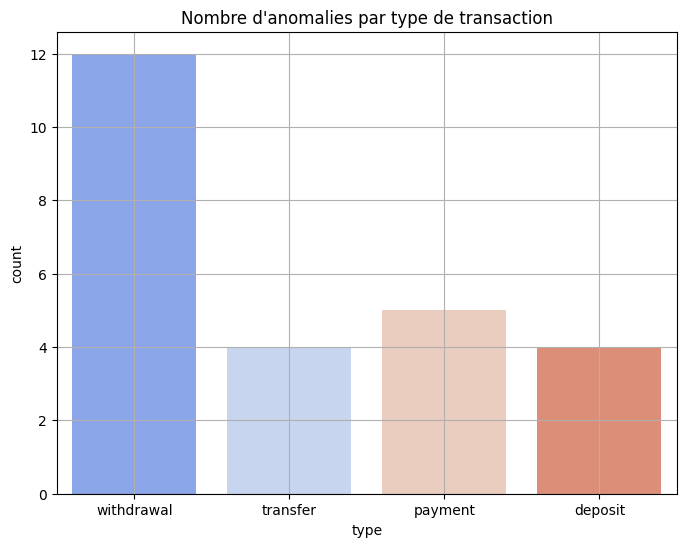

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=anomalies, x='type', palette="coolwarm")
plt.title("Nombre d'anomalies par type de transaction")
plt.grid()
plt.show()
